In [1]:
import numpy as np
import matplotlib.pyplot as plt

project = 'newfault'
traindate = '2024-10-01'
testdate = '2024-10-02'
traindate_path = '/home/sdybing/gnss-picker/cnn_models_outputs/' + project + '_fq_train/models/traindate_' + traindate + '/'
test_outputs_path = traindate_path + 'data/'
figure_save_dir = traindate_path + 'figures/'
realdata_dir = '/home/sdybing/gnss-picker/data/realdata/summer23/'

realtest_data = np.load(test_outputs_path + testdate + '_realtest_orig_data.npy')
realtest_metadata = np.load(test_outputs_path + testdate + '_realtest_metadata.npy')
realtest_target = np.load(test_outputs_path + testdate + '_realtest_target.npy')
realtest_predictions = np.load(test_outputs_path + testdate + '_realtest_predictions.npy')
rows_w_eqs = np.load(realdata_dir + 'real_metadata_rembad_rows_w_eqs.npy')

In [2]:
# new_meta = np.load(test_outputs_path + 'realtest_metadata_with_results_pgd_snr_thresh013.npy')
new_meta = np.load(test_outputs_path + 'real_testing/realtest_metadata_with_results_pgd_snr_thresh0135.npy')

# New metadata array columns:

# 0: station name
# 1: date sample came from
# 2: sample start time
# 3: sample end time
# 4: random n counter
# 5: sample P-wave arrives at (gauss pos)
# 6: earthquake magnitude
# 7: result
# 8: PGD
# 9: SNR N
# 10: SNR E
# 11: SNR Z
# 12: mean SNR

In [3]:
pgds = []
nonan_pgds = []

for idx in range(len(new_meta)):
    pgd = new_meta[idx,8]
    if pgd != 'nan':
        pgd = float(pgd)
        pgds.append(pgd)
        nonan_pgds.append(pgd)
    else:
        pgds.append(-99999)
        
print(len(pgds))
print(len(nonan_pgds))

994155
2123


In [4]:
max(nonan_pgds)

0.42687295824997146

In [5]:
i = np.where(new_meta[:,8] == str(max(nonan_pgds)))[0]
print(i)

j = np.where(np.array(pgds) >= 0.1)[0]
print(j)

[682677]
[ 15226  25610  81069  82015 229639 402342 579546 608992 647029 670943
 676348 681732 682677 733194 829310 856729]


In [6]:
realtest_data.shape

(994155, 128, 3)

15226
25610


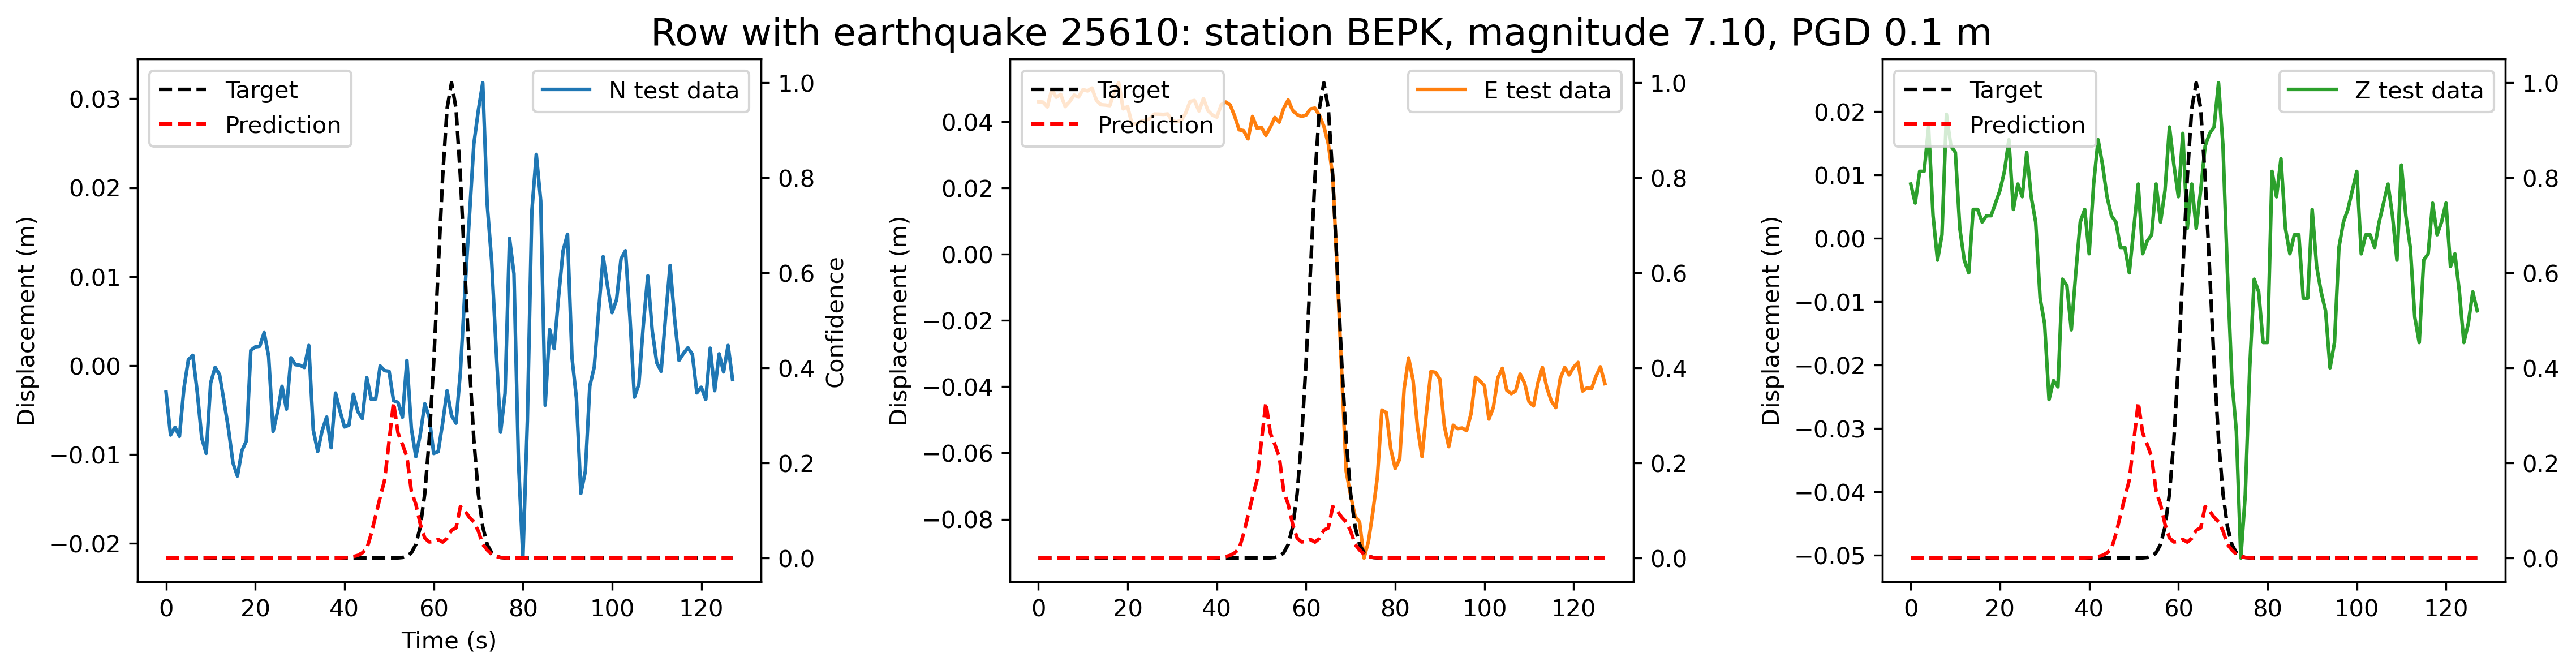

81069


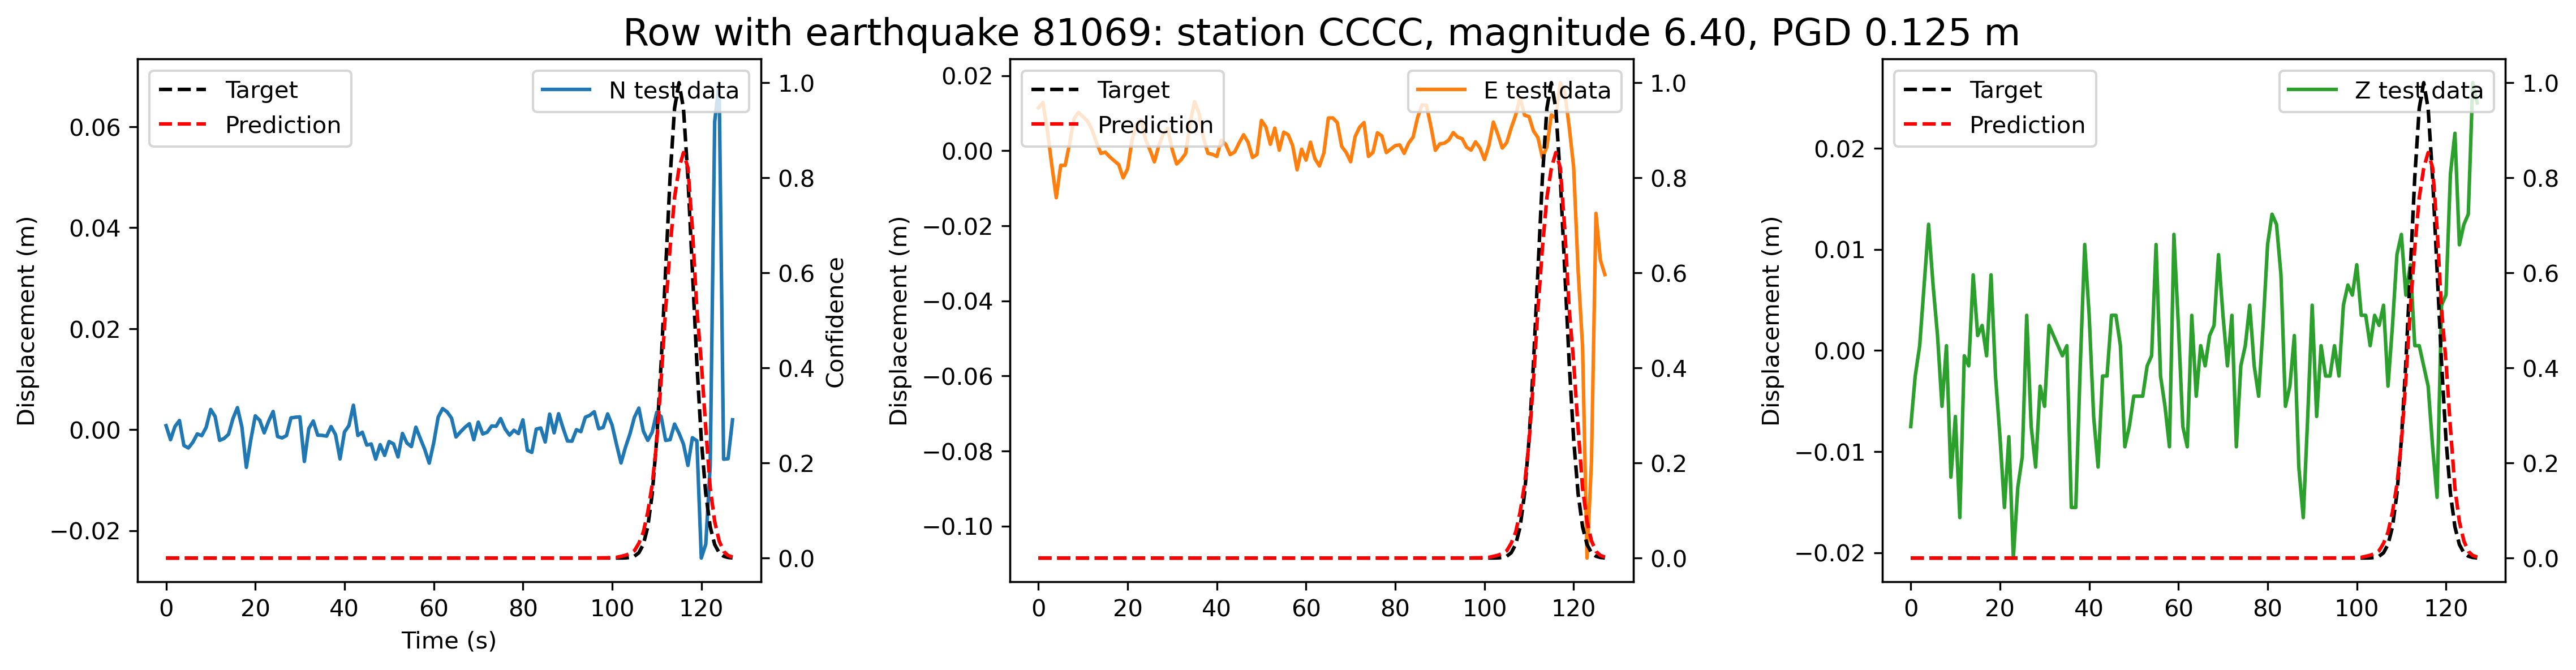

82015


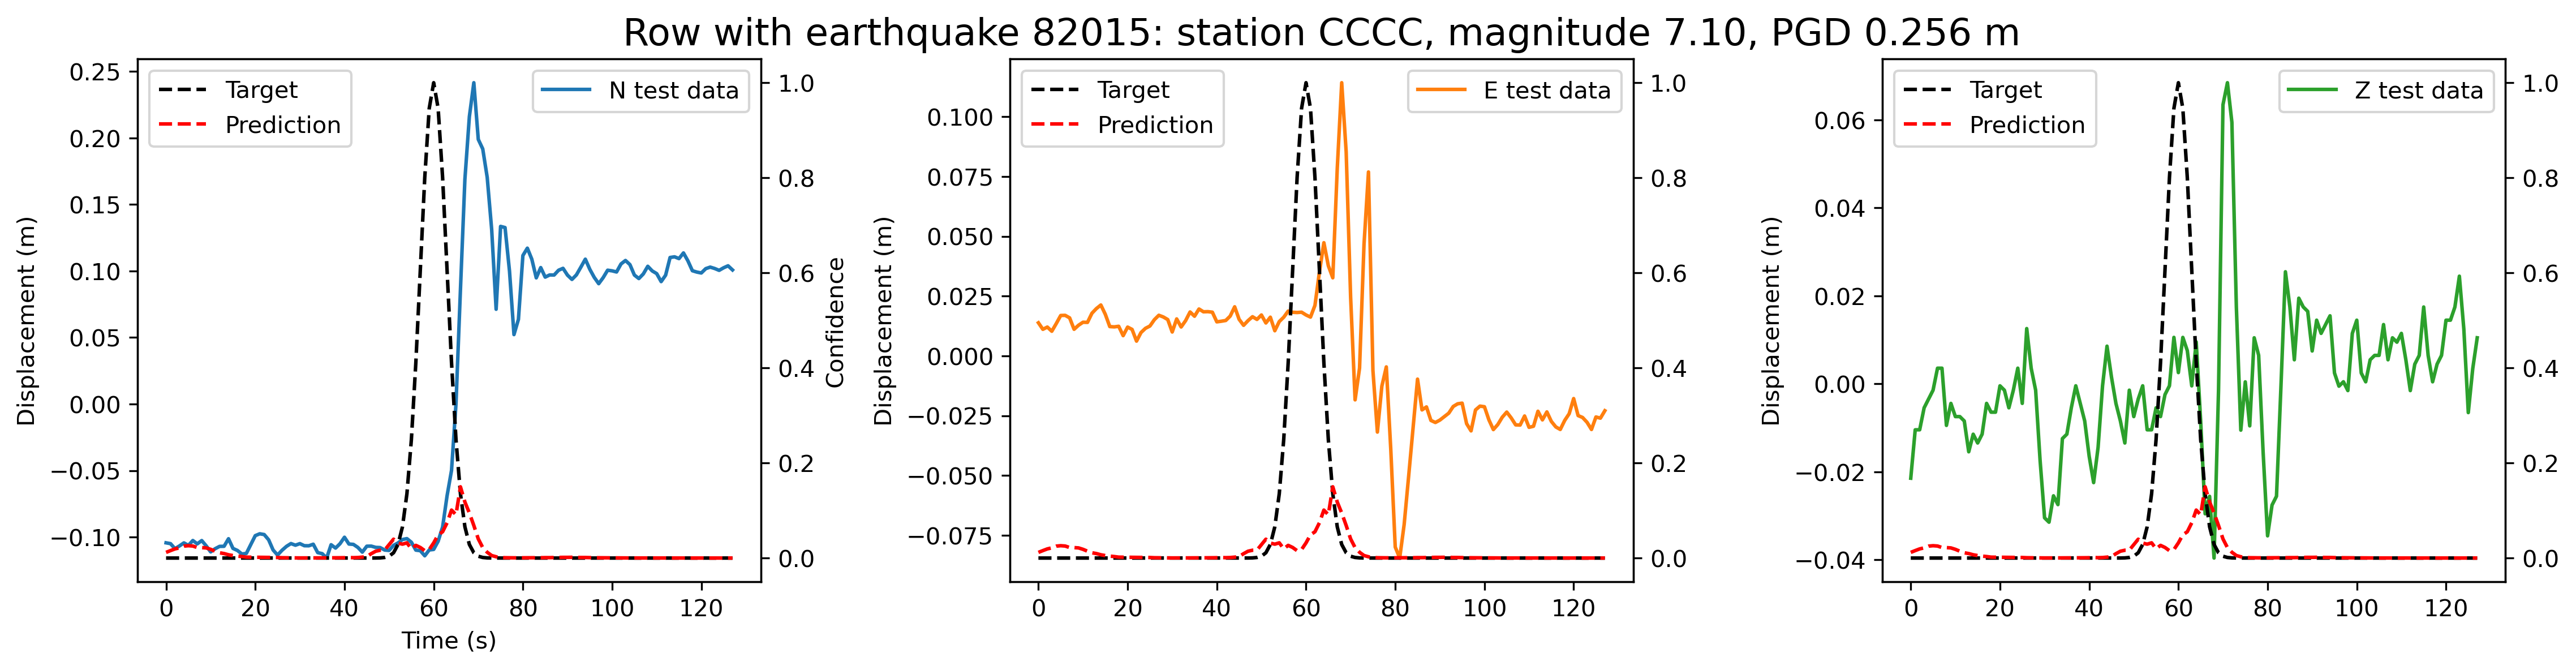

229639


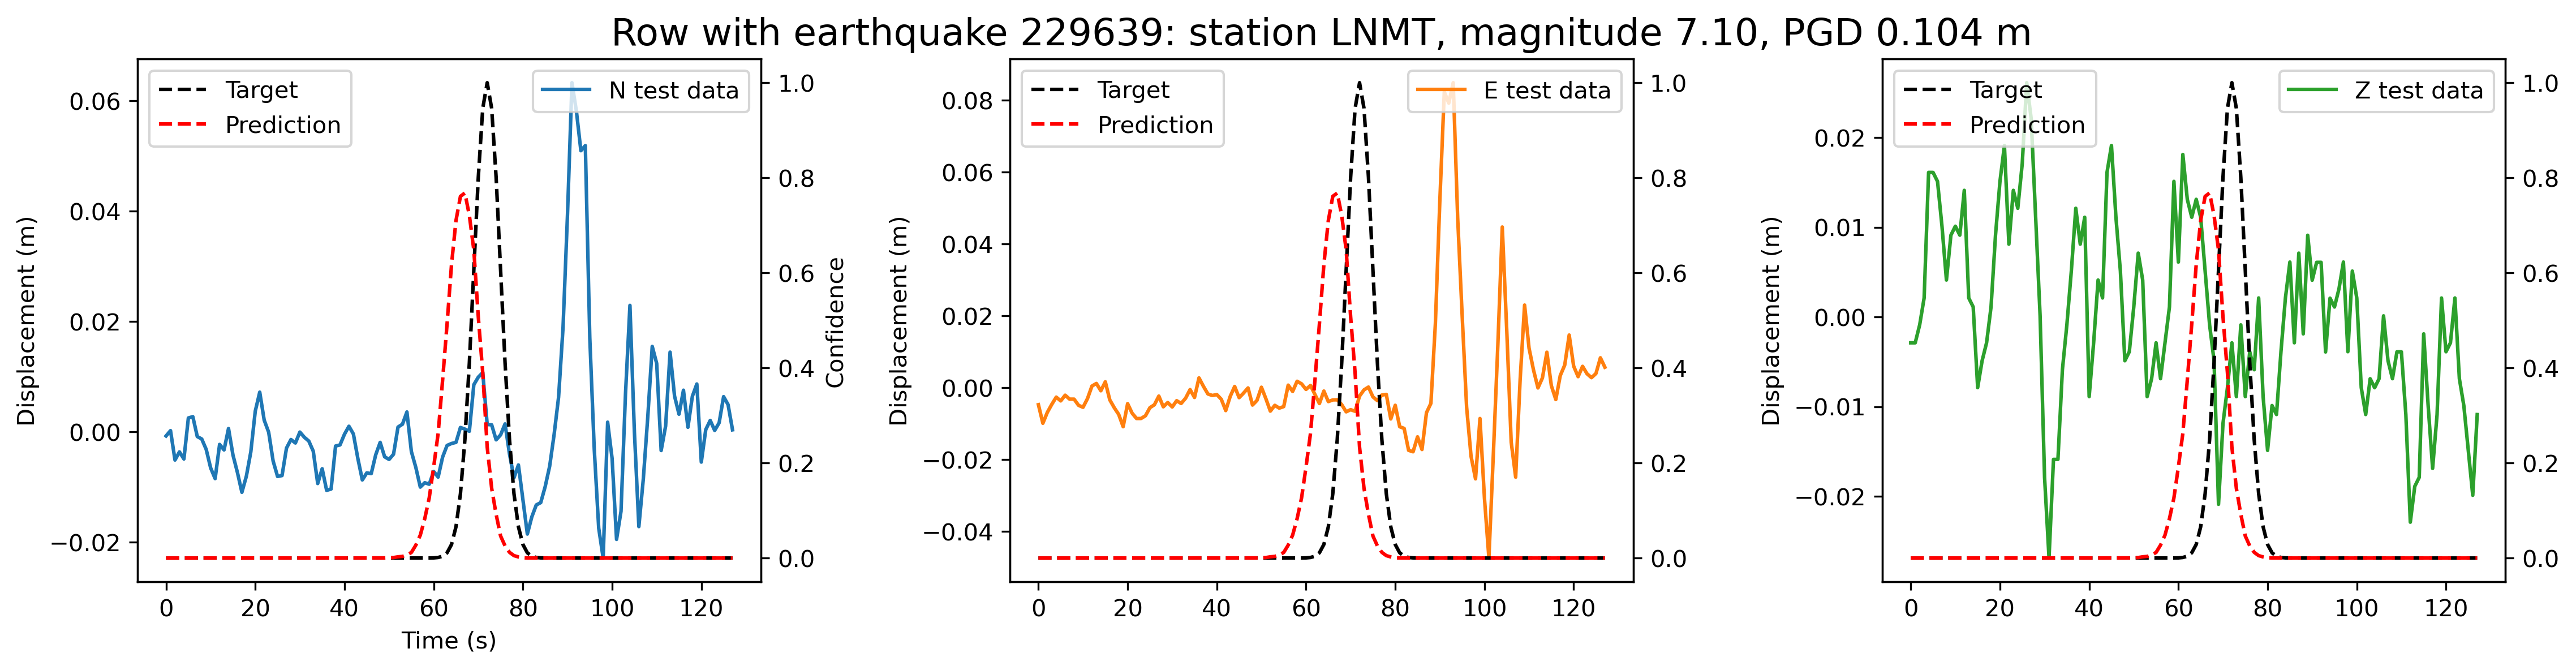

402342


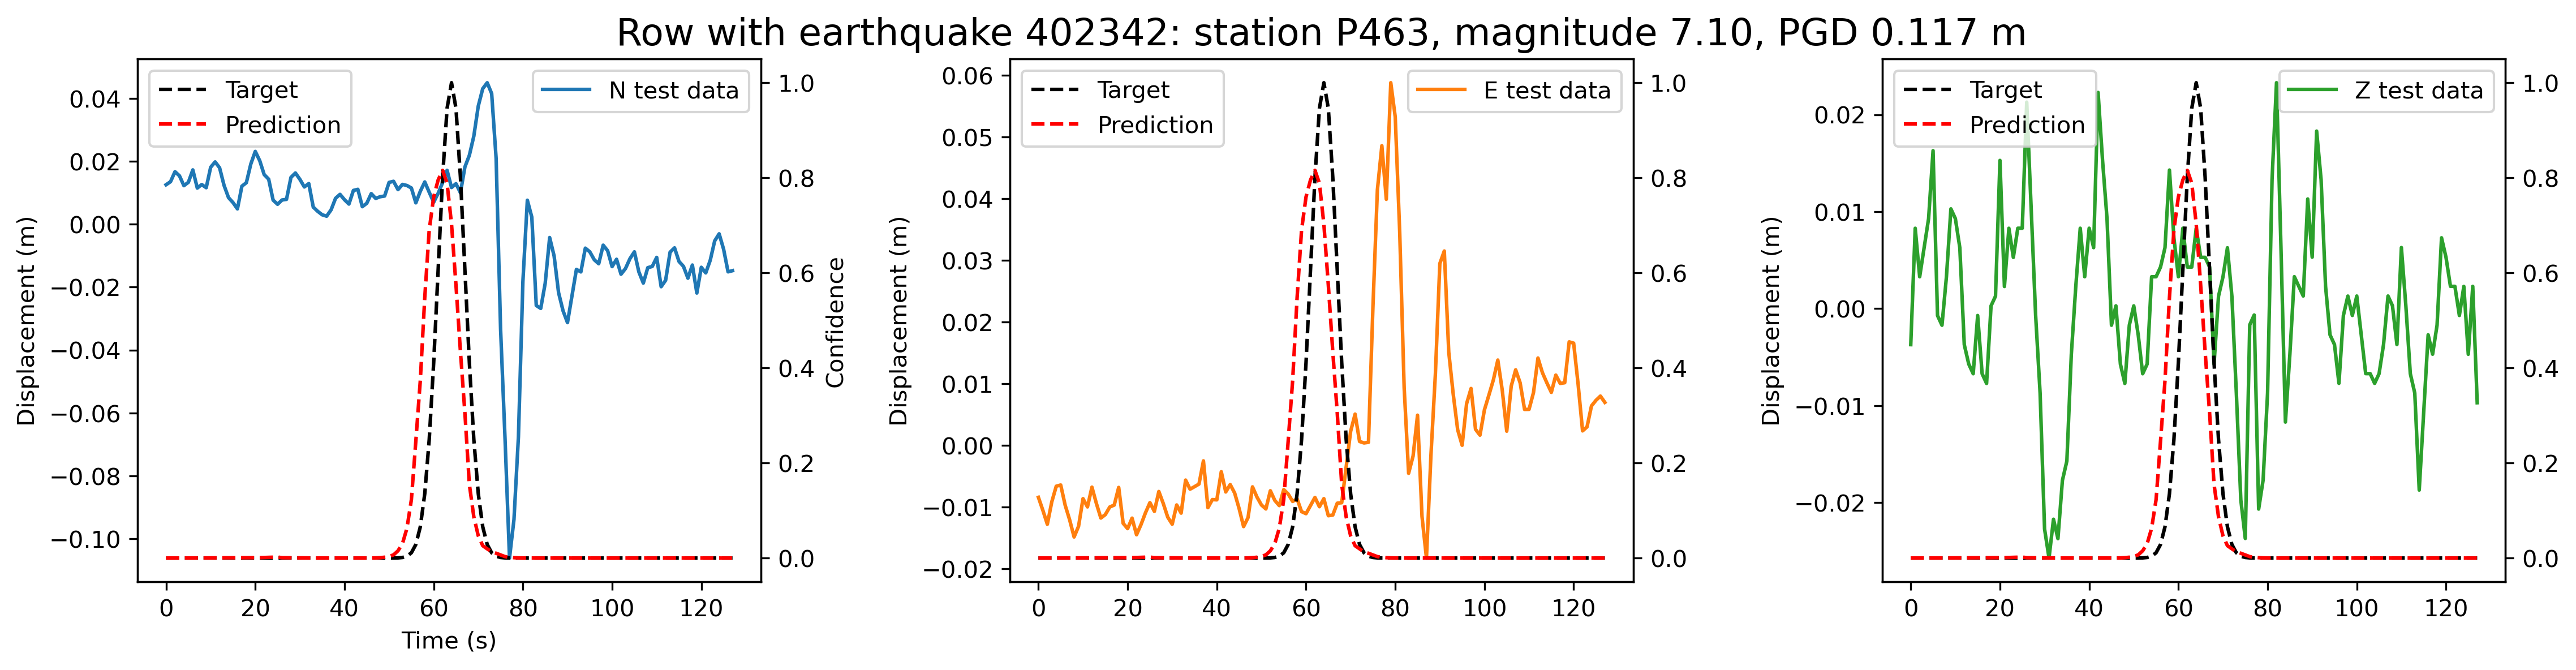

579546
608992


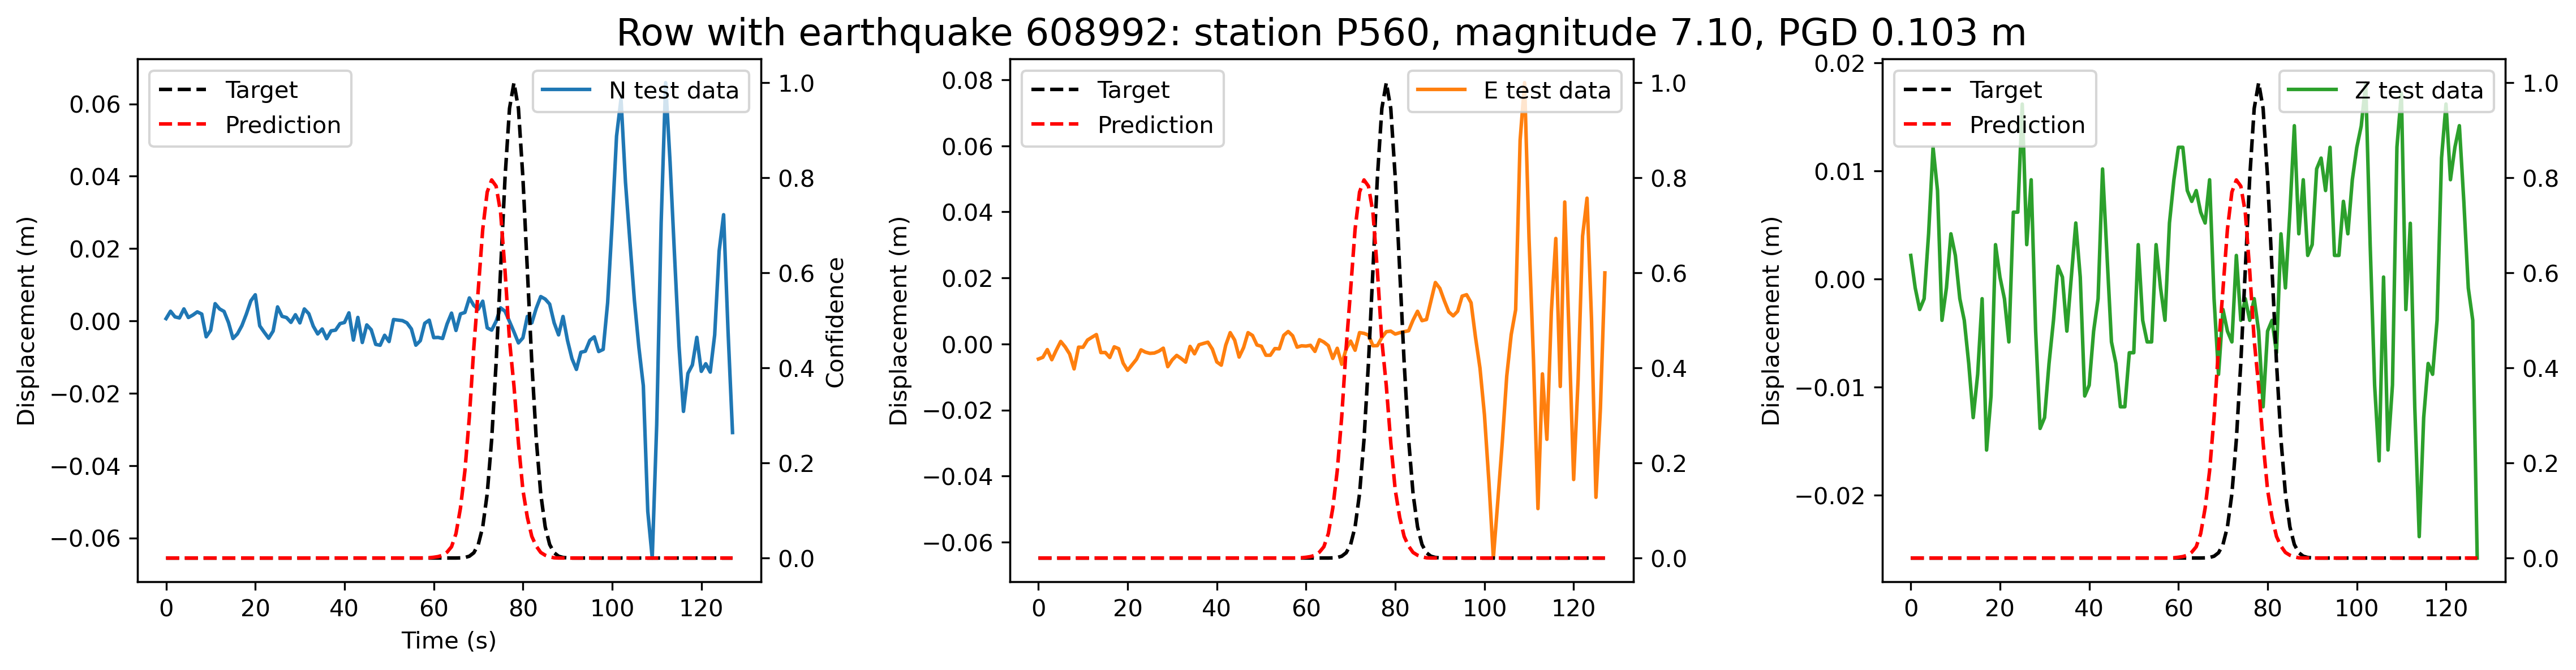

647029
670943


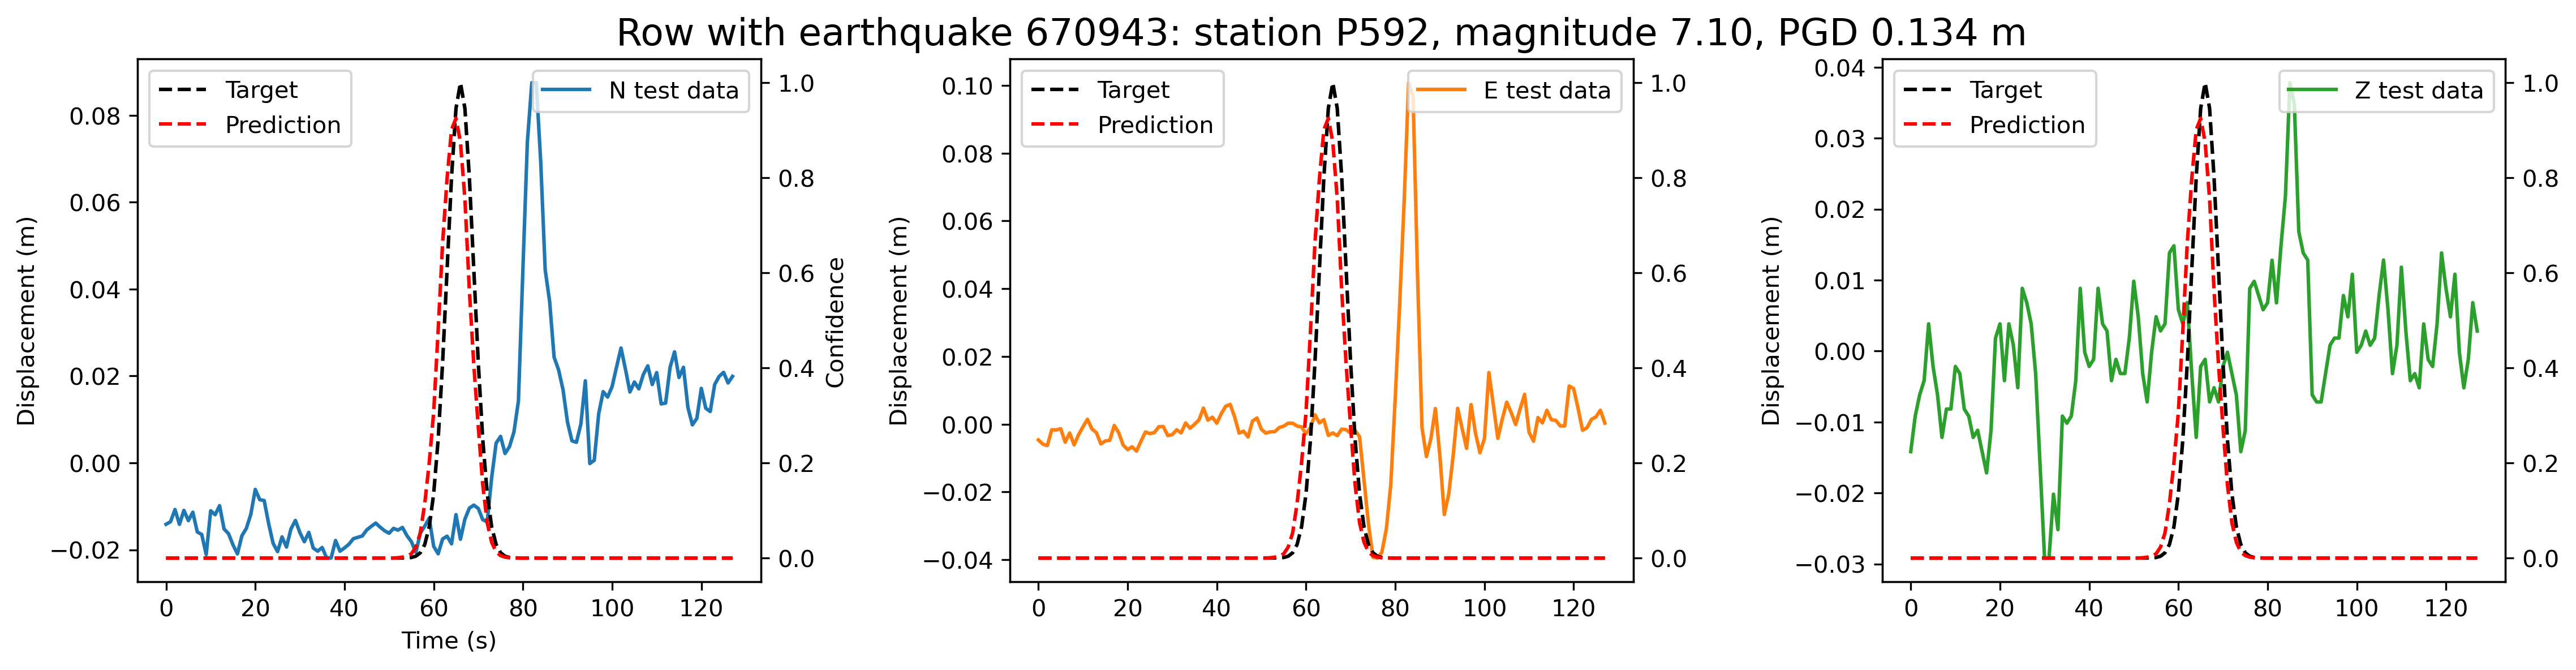

676348


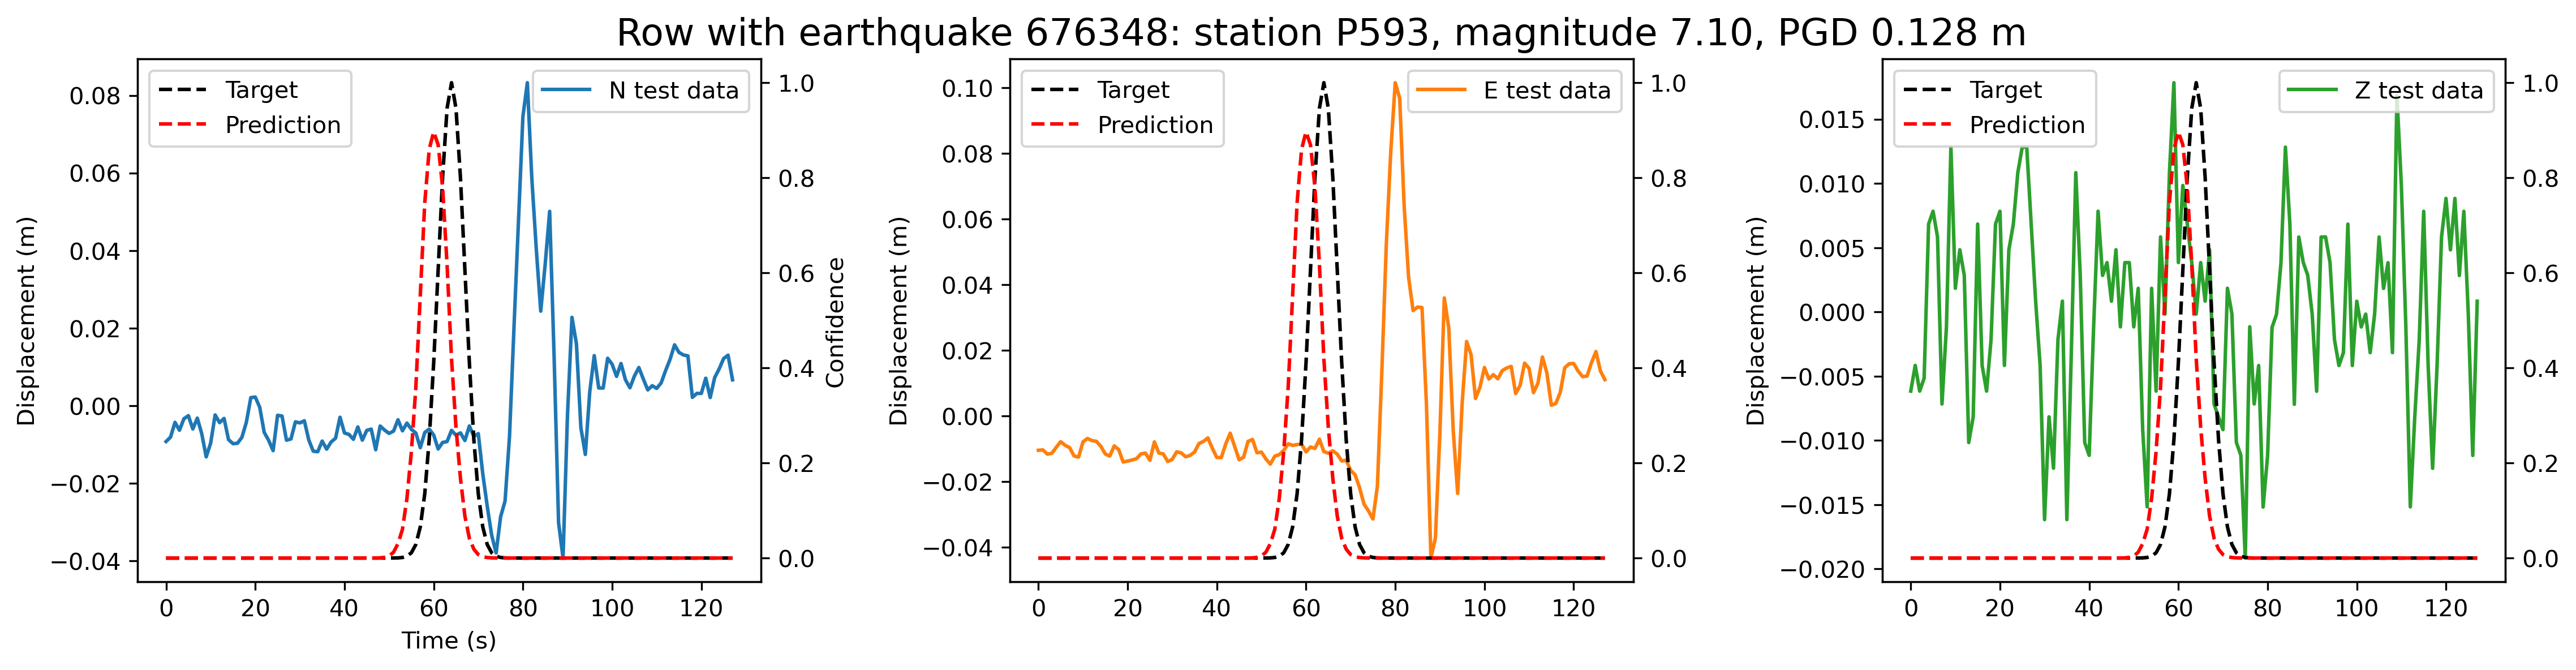

681732


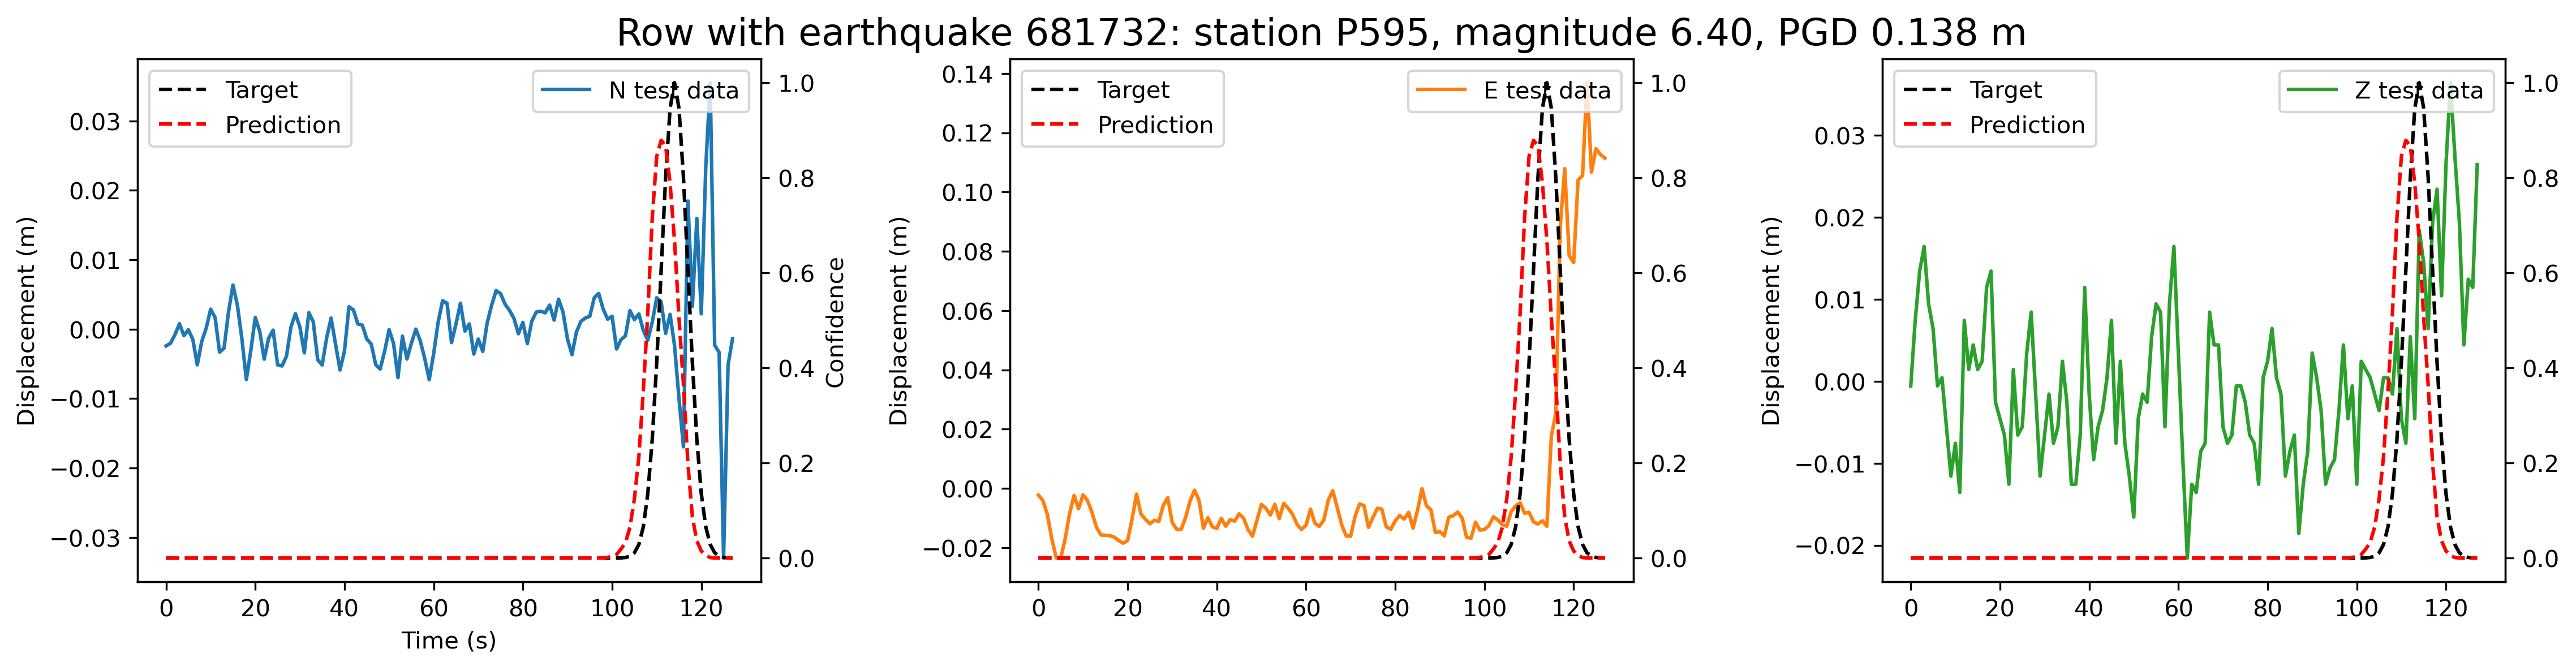

682677
733194


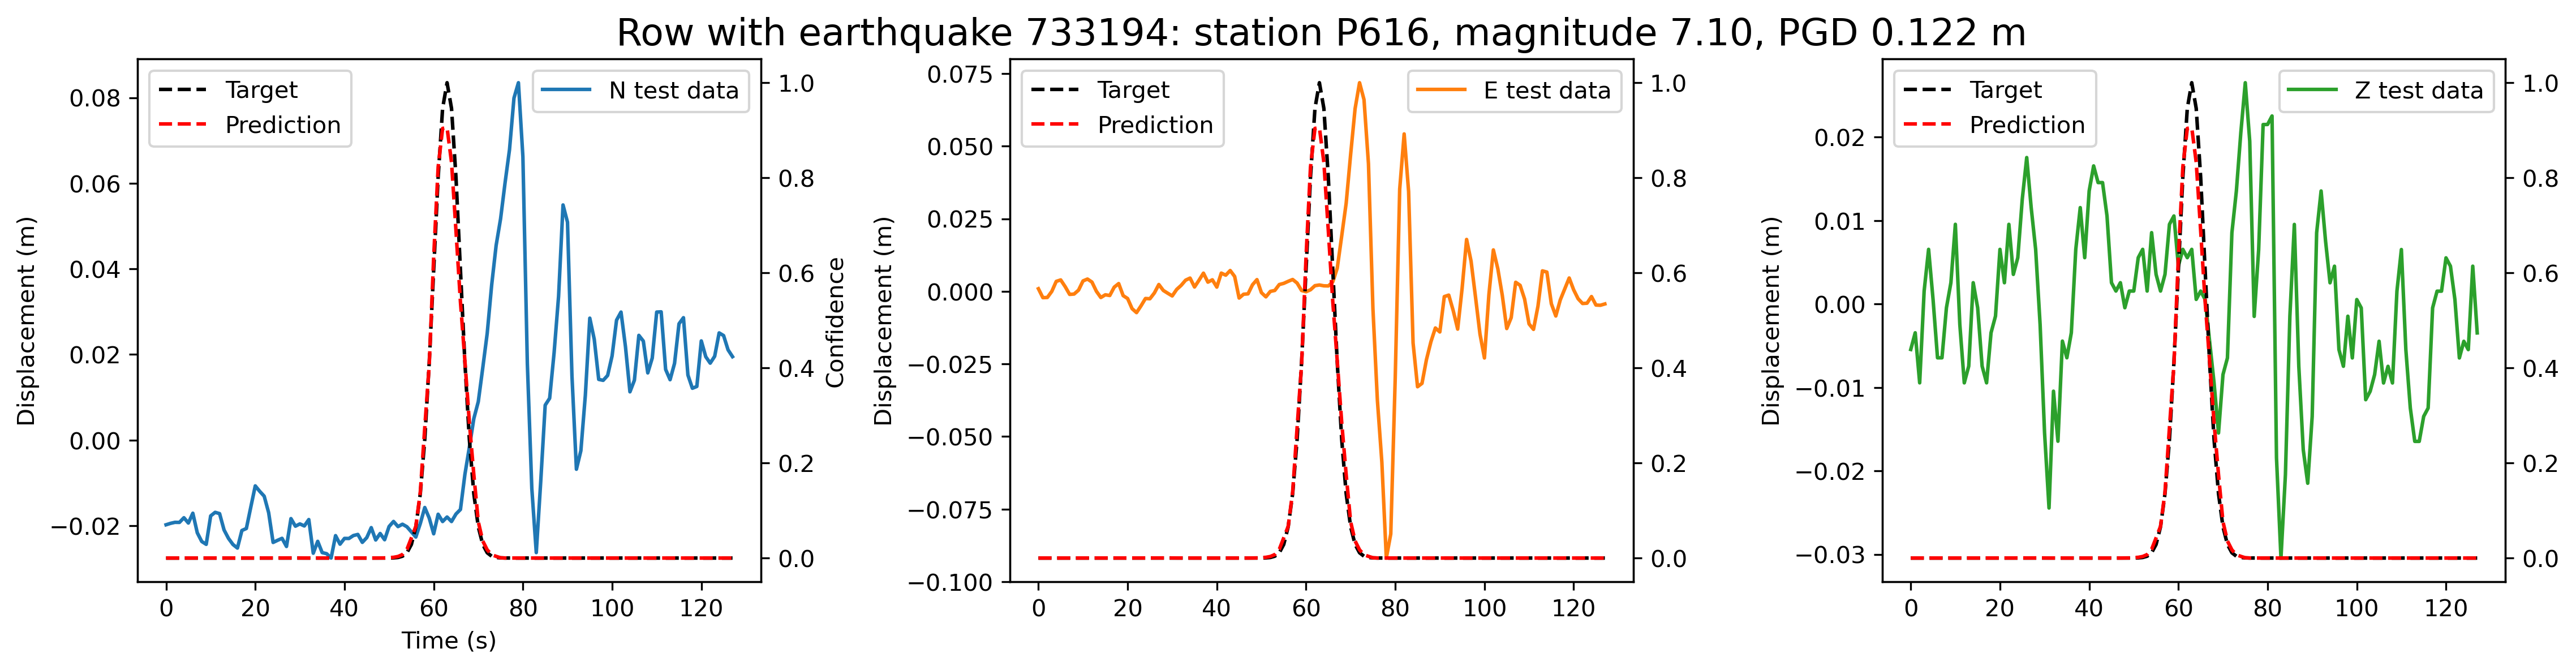

829310
856729


In [9]:
for ind in j:
    
    print(ind)
    sr = 1
    n_data = realtest_data[ind,:,0]
    e_data = realtest_data[ind,:,1]
    z_data = realtest_data[ind,:,2]
    pgd = np.max(np.sqrt((n_data)**2+(e_data)**2+(z_data)**2))
#     print(max(realtest_predictions[ind]))
    
    if max(realtest_predictions[ind]) > 0.135:

        fig = plt.subplots(nrows = 1, ncols = 3, figsize = (18,4), dpi = 300)
        plt.subplots_adjust(wspace = 0.4)
        t = 1/sr * np.arange(realtest_data.shape[1])
        # print(t)

        ax1 = plt.subplot(131)
        ax1.plot(t, realtest_data[ind,:,0], label = 'N test data', color = 'C0')
        ax1.set_ylabel('Displacement (m)')
        ax1.set_xlabel('Time (s)')
        ax1.legend(loc = 'upper right')
        ax2 = ax1.twinx()
        ax2.plot(t, realtest_target[ind,:], color = 'black', linestyle = '--', label = 'Target')
        ax2.plot(t, realtest_predictions[ind,:], color = 'red', linestyle = '--', label = 'Prediction')
        ax2.set_ylabel('Confidence')
        ax2.set_ylim(-0.05,1.05)
        ax2.legend(loc = 'upper left')

        ax3 = plt.subplot(132)
        ax3.set_title('Row with earthquake ' + str(ind) + ': station ' + str(realtest_metadata[ind,0]) + ', magnitude ' + str(realtest_metadata[ind,6]) + ', PGD ' + str(np.round(pgd,3)) + ' m', fontsize = 16)
        ax3.plot(t, realtest_data[ind,:,1], label = 'E test data', color = 'C1')
        ax3.set_ylabel('Displacement (m)')
        ax3.legend(loc = 'upper right')
        ax4 = ax3.twinx()
        ax4.plot(t, realtest_target[ind,:], color = 'black', linestyle = '--', label = 'Target')
        ax4.plot(t, realtest_predictions[ind,:], color = 'red', linestyle = '--', label = 'Prediction')
        ax4.set_ylim(-0.05,1.05)
        ax4.legend(loc = 'upper left')

        ax5 = plt.subplot(133)
        ax5.plot(t, realtest_data[ind,:,2], label = 'Z test data', color = 'C2')
        ax5.set_ylabel('Displacement (m)')
        ax5.legend(loc = 'upper right')
        ax6 = ax5.twinx()
        ax6.plot(t, realtest_target[ind,:], color = 'black', linestyle = '--', label = 'Target')
        ax6.plot(t, realtest_predictions[ind,:], color = 'red', linestyle = '--', label = 'Prediction')
        ax6.set_ylim(-0.05,1.05)
        ax6.legend(loc = 'upper left')

        plt.show();
#         plt.savefig(figure_save_dir + 'realtestdata_pgdshigherthan01_wvfplots/row_' + str(ind) + '_plot_predictions_MISS.png', format = 'PNG')
#         plt.close();


15226


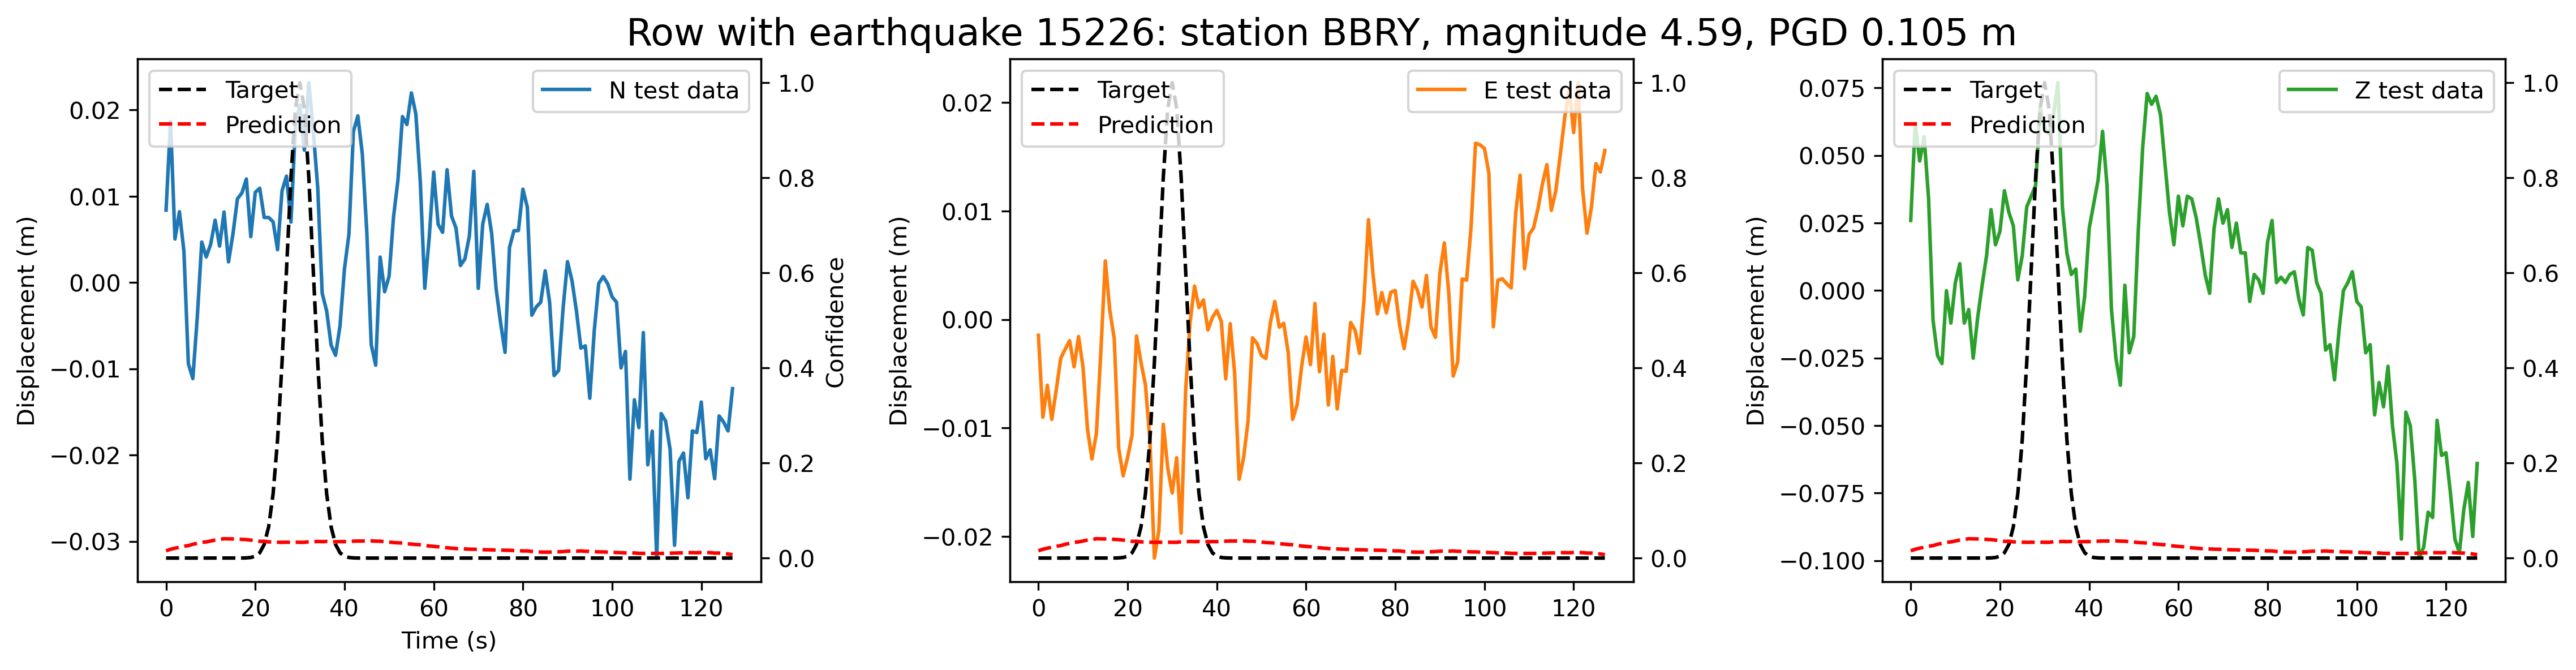

25610
81069
82015
229639
402342
579546


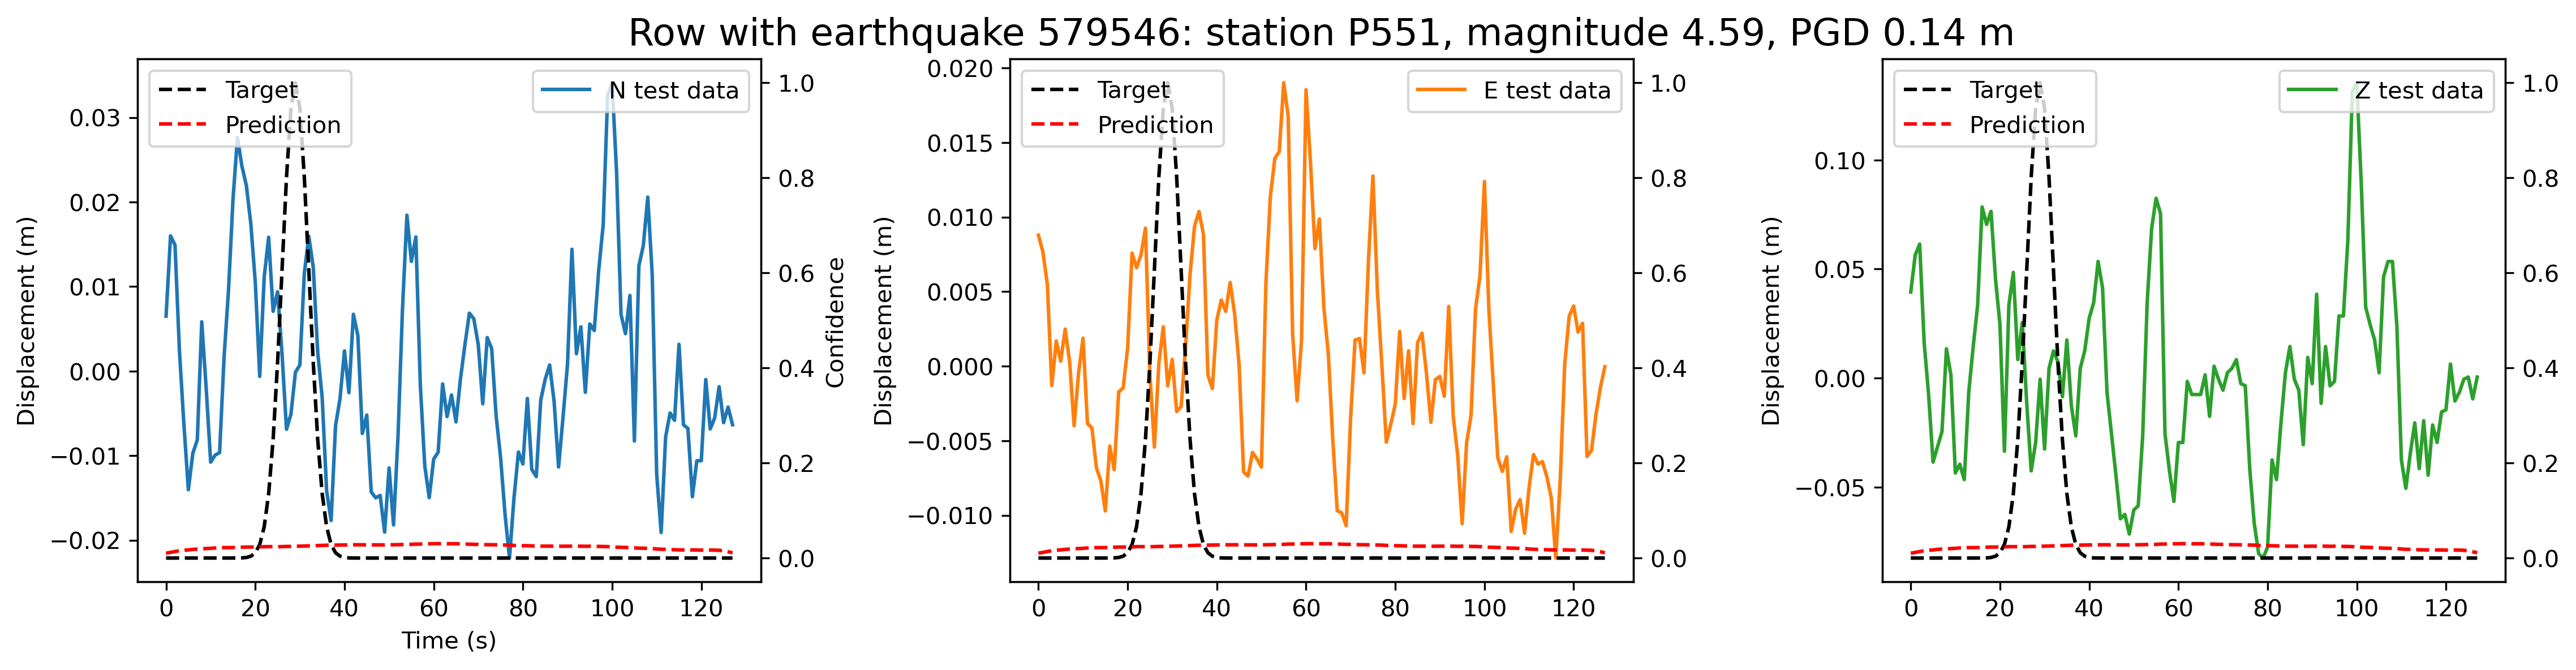

608992
647029


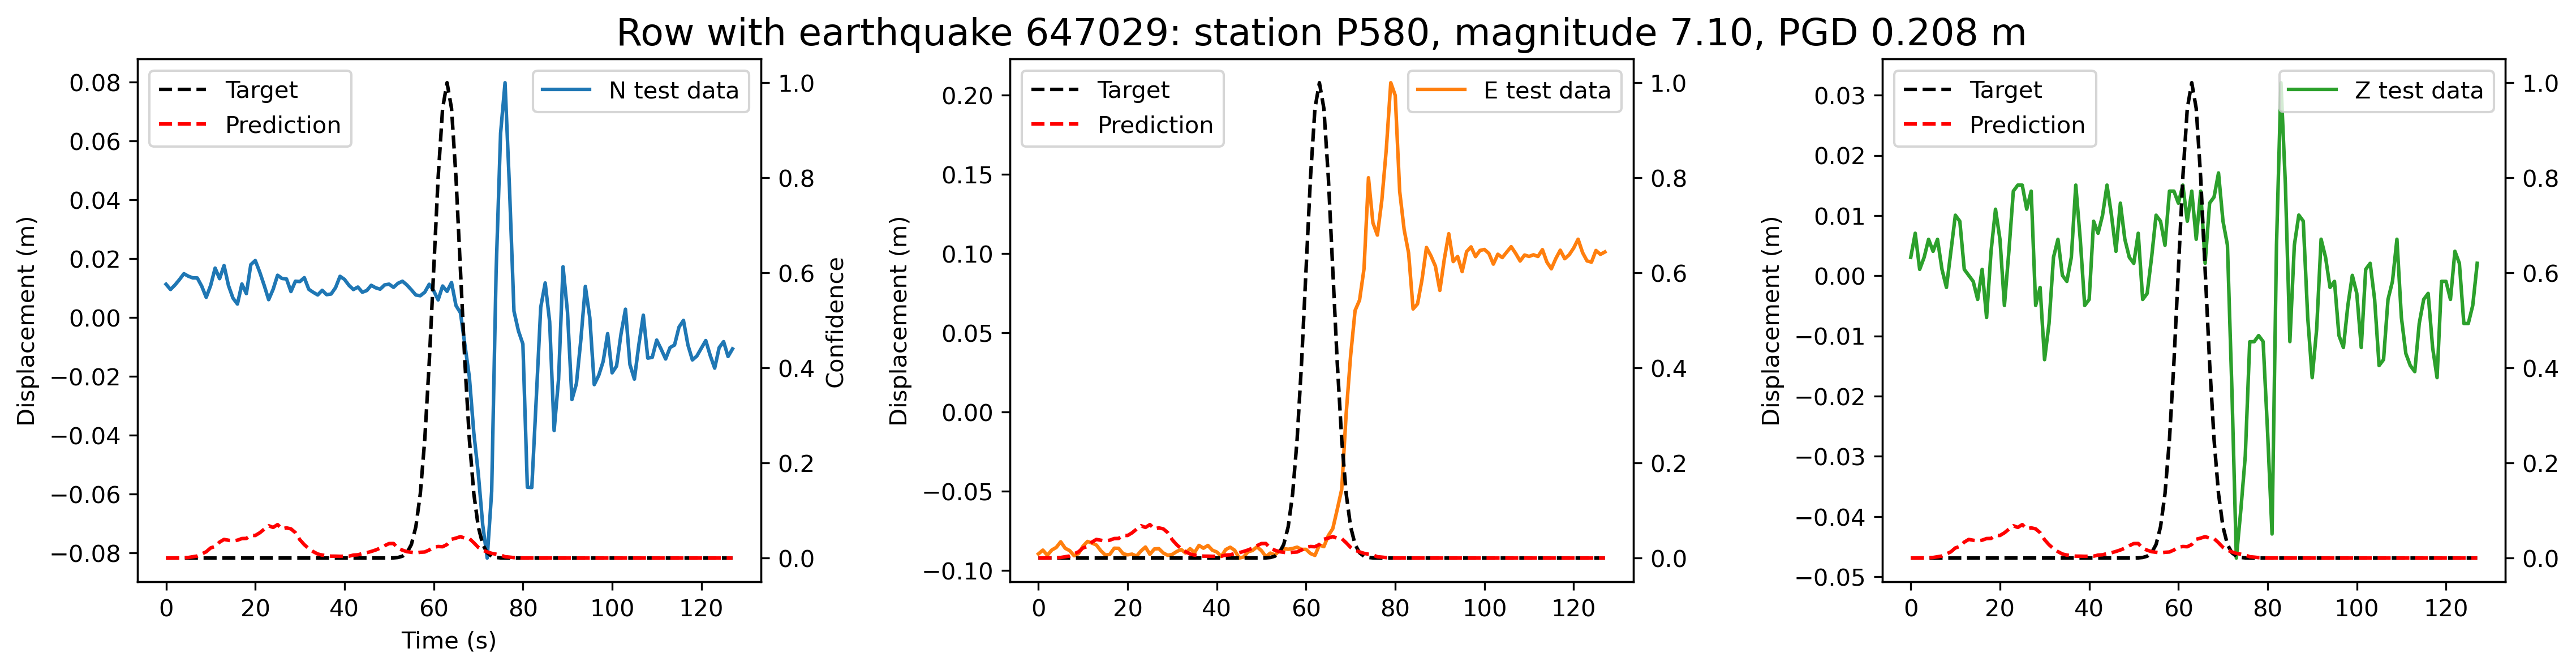

670943
676348
681732
682677


In [ ]:
# Misses

for ind in j:
    
    print(ind)
    sr = 1
    n_data = realtest_data[ind,:,0]
    e_data = realtest_data[ind,:,1]
    z_data = realtest_data[ind,:,2]
    pgd = np.max(np.sqrt((n_data)**2+(e_data)**2+(z_data)**2))
#     print(max(realtest_predictions[ind]))
    
    if max(realtest_predictions[ind]) < 0.135:

        fig = plt.subplots(nrows = 1, ncols = 3, figsize = (18,4), dpi = 300)
        plt.subplots_adjust(wspace = 0.4)
        t = 1/sr * np.arange(realtest_data.shape[1])
        # print(t)

        ax1 = plt.subplot(131)
        ax1.plot(t, realtest_data[ind,:,0], label = 'N test data', color = 'C0')
        ax1.set_ylabel('Displacement (m)')
        ax1.set_xlabel('Time (s)')
        ax1.legend(loc = 'upper right')
        ax2 = ax1.twinx()
        ax2.plot(t, realtest_target[ind,:], color = 'black', linestyle = '--', label = 'Target')
        ax2.plot(t, realtest_predictions[ind,:], color = 'red', linestyle = '--', label = 'Prediction')
        ax2.set_ylabel('Confidence')
        ax2.set_ylim(-0.05,1.05)
        ax2.legend(loc = 'upper left')

        ax3 = plt.subplot(132)
        ax3.set_title('Row with earthquake ' + str(ind) + ': station ' + str(realtest_metadata[ind,0]) + ', magnitude ' + str(realtest_metadata[ind,6]) + ', PGD ' + str(np.round(pgd,3)) + ' m', fontsize = 16)
        ax3.plot(t, realtest_data[ind,:,1], label = 'E test data', color = 'C1')
        ax3.set_ylabel('Displacement (m)')
        ax3.legend(loc = 'upper right')
        ax4 = ax3.twinx()
        ax4.plot(t, realtest_target[ind,:], color = 'black', linestyle = '--', label = 'Target')
        ax4.plot(t, realtest_predictions[ind,:], color = 'red', linestyle = '--', label = 'Prediction')
        ax4.set_ylim(-0.05,1.05)
        ax4.legend(loc = 'upper left')

        ax5 = plt.subplot(133)
        ax5.plot(t, realtest_data[ind,:,2], label = 'Z test data', color = 'C2')
        ax5.set_ylabel('Displacement (m)')
        ax5.legend(loc = 'upper right')
        ax6 = ax5.twinx()
        ax6.plot(t, realtest_target[ind,:], color = 'black', linestyle = '--', label = 'Target')
        ax6.plot(t, realtest_predictions[ind,:], color = 'red', linestyle = '--', label = 'Prediction')
        ax6.set_ylim(-0.05,1.05)
        ax6.legend(loc = 'upper left')

        plt.show();
#         plt.savefig(figure_save_dir + 'realtestdata_pgdshigherthan01_wvfplots/row_' + str(ind) + '_plot_predictions_MISS.png', format = 'PNG')
#         plt.close();
